**Animal Welfare Center - 

Prediction of Animal Outcome State, from a Multiclass target column. 
The dataset comprises of Categorical and Numerical Features. Apply Your Furnished feature selection techniques and Modelling of classifiers to predict the state. **

![Imgur](https://i.imgur.com/F2FeDI8.png)


![Imgur](https://i.imgur.com/X7uFllL.png)

In [12]:
#DATA LOADING 
import pandas as pd
import numpy as np 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from catboost import Pool, CatBoostClassifier, cv
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#import pickle---(Check on if to save the model for training again !)
#Loading The DataSet as Train Data and Test Data 
X = pd.read_csv("../input/animalstate-awc/train.csv")
X_test_full = pd.read_csv("../input/animalstate-awc/test.csv")
y = X.outcome_type
X.drop(['outcome_type'], axis=1, inplace=True)

#FEATURE SELECTION OF NUMERIC AND CATEGORICAL COLUMNS -----

Numerical_cols = [col for col in X.columns if X[col].dtype == "int64" or X[col].dtype =="float64"]
X_numeric = X[Numerical_cols]
print("The Following are Numerical Columns : \n",Numerical_cols,sep="\n")

#Columns to be dropped are:- 
     #Dropped                                    -  Categorical Equivalent Columns
#1. age_upon_intake(days),age_upon_intake(years) - [age_upon_intake_age_group]
#2. age_upon_outcome(days), age_upon_outcome(years) -[age_upon_outcome_age_group]

#3. intake_number - outcome_number, Both are Equal, very obvious. Hence dropping one of them

X_numeric.drop(['age_upon_intake_(days)','age_upon_intake_(years)','age_upon_outcome_(days)',
                'age_upon_outcome_(years)','intake_number'],axis=1,inplace=True)

# Print number of unique entries by column, in ascending order
object_nunique = list(map(lambda col: X[col].nunique(), Numerical_cols))
d1 = dict(zip(Numerical_cols, object_nunique))

#print("For Numerical Variables, Unique Values in each Column : ", sorted(d1.items(), key=lambda x: x[1]), sep="\n")
list1 = ['age_upon_intake_(days)','age_upon_intake_(years)','age_upon_outcome_(days)',
                'age_upon_outcome_(years)','intake_number']
print("Numerical Columns to Be dropped are: \n", list1)
print("Numerical Columns Considered for Correlation are : \n")
display( X_numeric.head())

#CATEGORICAL COLUMNS FILETERING
Categorical_cols = [col for col in X.columns if X[col].dtype == "object"]
print("The Following are Categorical Columns : \n",Categorical_cols)

#GETTING THE CATEGORICAL DF READY
X_categorical = X[Categorical_cols]

#CHECKING FOR UNIQUE VALUES IN THE COLUMNS TO CONSIDER CARDINALITY AND HENCE DROP SUCH COLUMNS--
object_nunique = list(map(lambda col: X[col].nunique(), Categorical_cols))
d = dict(zip(Categorical_cols, object_nunique))
# Print number of unique entries by column, in ascending order

#print("For Categorical Variables Unique Value in each column: ", sorted(d.items(), key=lambda x: x[1]), sep ="\n")


#REMOVING AND REPLACING HIGH CARDINALITY CATEGORICAL COLUMNS ---
#Points to be kept in mind :- 
#We will Replace Most of the Categorical Columns with Numeric Ones to Enhace our Label encoding.
#After Dropping the Columns from Here, we will Still Check for correlation, to extract proper Features
#Dropped Columns are categorical data which was just increasing the cardinality. 


#Columns to be Dropped are :-
    #Dropped        Numeric Columns Equivalent
#1. date_of_birth - [dob_year,dob_month]
#2. intake_monthyear, intake_datetime  - [intake_month, intake_year, intake_ hour]
#3. outcome_monthyear, outcome_datetime - [outcome_month, outcome_year, outcome_hour]
#4. time_in-shelter - [time_in_shelter_days]
#5. animal_id_outcome - not considerate in training and correlation
#6. age_upon_intake, age_upon_outcome

X_categorical.drop(["animal_id_outcome","outcome_datetime","intake_datetime",
                    'date_of_birth','intake_monthyear','intake_datetime',
                    'outcome_monthyear','outcome_datetime','time_in_shelter',
                   'age_upon_intake','age_upon_outcome'],axis=1,inplace=True)

list2 = ["animal_id_outcome","outcome_datetime","intake_datetime",
                    'date_of_birth','intake_monthyear','intake_datetime',
                    'outcome_monthyear','outcome_datetime','time_in_shelter',
                   'age_upon_intake','age_upon_outcome']
print("Categorical Columns to Be dropped are : \n", list2)
print("Categorical Columns Considered for Correlation are : \n")
display(X_categorical.head())

#DEFINING LABEL ENCODER -
le = LabelEncoder()

#USING LABEL ENCODER TO ENCODE ALL THE CATEGORICAL COLUMNS NOW--
X_cCodes = X_categorical.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

#Remark : While label encoding Categorical Columns we will have float like string values,
#hence handle such columns by converting Df columns astype(str) explicitly.

#USING LABEL ENCODER TO ENCODE ALL THE NUMERICAL COLUMNS NOW--
X_nCodes = X_numeric.apply(LabelEncoder().fit_transform)

#TARGET VARIABLE COLUMN TRANSFORM - 
#Now Apply Label Encoding on The Target Variable Column - 

le.fit(y)
y_codes = le.transform(y)

#Displaying Label Encoded Columns, Now we proceed to Extract the Imp Features.
print("Displaying Categorical Label Encoded Columns : ")
display(X_cCodes.head())
print("Displaying Numerical Label Encoded Columns : ")
display(X_nCodes.head())










The Following are Numerical Columns : 

['dob_year', 'dob_month', 'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)', 'intake_month', 'intake_year', 'intake_hour', 'intake_number', 'time_in_shelter_days', 'age_upon_outcome_(days)', 'age_upon_outcome_(years)', 'outcome_month', 'outcome_year', 'outcome_hour', 'outcome_number']
Numerical Columns to Be dropped are: 
 ['age_upon_intake_(days)', 'age_upon_intake_(years)', 'age_upon_outcome_(days)', 'age_upon_outcome_(years)', 'intake_number']
Numerical Columns Considered for Correlation are : 



/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,dob_year,dob_month,count,intake_month,intake_year,intake_hour,time_in_shelter_days,outcome_month,outcome_year,outcome_hour,outcome_number
0,2007,7,1,12,2017,14,0.588194,12,2017,0,1.0
1,2007,7,1,12,2014,10,1.259722,12,2014,16,2.0
2,2007,7,1,3,2014,14,1.113889,3,2014,17,3.0
3,2004,4,1,4,2014,15,4.970139,4,2014,15,1.0
4,1997,10,1,11,2013,9,0.119444,11,2013,11,1.0


The Following are Categorical Columns : 
 ['animal_id_outcome', 'age_upon_intake', 'animal_type', 'breed', 'color', 'intake_condition', 'intake_type', 'sex_upon_intake', 'age_upon_intake_age_group', 'intake_datetime', 'intake_monthyear', 'intake_weekday', 'time_in_shelter', 'age_upon_outcome', 'date_of_birth', 'sex_upon_outcome', 'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_monthyear', 'outcome_weekday']
Categorical Columns to Be dropped are : 
 ['animal_id_outcome', 'outcome_datetime', 'intake_datetime', 'date_of_birth', 'intake_monthyear', 'intake_datetime', 'outcome_monthyear', 'outcome_datetime', 'time_in_shelter', 'age_upon_intake', 'age_upon_outcome']
Categorical Columns Considered for Correlation are : 



,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,age_upon_intake_age_group,intake_weekday,sex_upon_outcome,age_upon_outcome_age_group,outcome_weekday
0,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,"(7.5, 10.0]",Thursday,Neutered Male,"(7.5, 10.0]",Thursday
1,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,"(5.0, 7.5]",Friday,Neutered Male,"(5.0, 7.5]",Saturday
2,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,"(5.0, 7.5]",Friday,Neutered Male,"(5.0, 7.5]",Saturday
3,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,"(7.5, 10.0]",Wednesday,Neutered Male,"(7.5, 10.0]",Monday
4,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,"(15.0, 17.5]",Saturday,Neutered Male,"(15.0, 17.5]",Saturday


Displaying Categorical Label Encoded Columns : 


,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,age_upon_intake_age_group,intake_weekday,sex_upon_outcome,age_upon_outcome_age_group,outcome_weekday
0,2,1707,441,3,3,2,8,4,2,8,4
1,2,1707,441,3,2,2,7,0,2,7,2
2,2,1707,441,3,2,2,7,0,2,7,2
3,2,718,375,3,1,2,8,6,2,8,1
4,2,1618,154,2,2,2,3,2,2,3,2


Displaying Numerical Label Encoded Columns : 


,dob_year,dob_month,count,intake_month,intake_year,intake_hour,time_in_shelter_days,outcome_month,outcome_year,outcome_hour,outcome_number
0,15,6,0,11,4,14,762,11,4,0,0
1,15,6,0,11,1,10,1719,11,1,15,1
2,15,6,0,2,1,14,1512,2,1,16,2
3,12,3,0,3,1,15,5082,3,1,14,0
4,5,9,0,10,0,9,171,10,0,10,0


**EXTRACTING CATEGORICAL COLUMNS**

In [13]:
#CHI^2 TEST RUN !
#Selecting Categorcial Features
bestfeatures = SelectKBest(score_func=chi2, k="all")
fit = bestfeatures.fit(X_cCodes,y_codes)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_cCodes.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
featureScores["Score"]=featureScores.Score.apply(np.round)
#print(featureScores.nlargest(10,'Score'))  #print 10 best features
featureScores.sort_values(by=['Score'], ascending=False,inplace=True)
featureScores

,Features,Score
1,breed,98013.0
2,color,41432.0
6,age_upon_intake_age_group,18944.0
9,age_upon_outcome_age_group,18786.0
5,sex_upon_intake,6319.0
8,sex_upon_outcome,2126.0
0,animal_type,1389.0
4,intake_type,493.0
3,intake_condition,434.0
10,outcome_weekday,67.0


[0.04144855 0.19953941 0.23992931 0.03921027 0.06856107 0.04909683
 0.02238943 0.13038726 0.07899883 0.02180338 0.10863566]


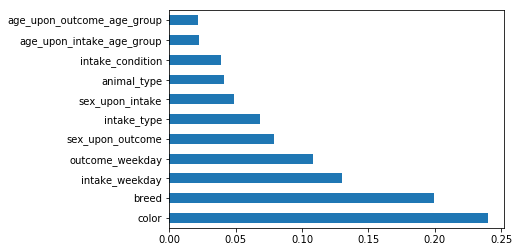

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_cCodes,y_codes)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_cCodes.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()


In [15]:
#Hence Extracting Final Categorical Features.
X_drop_categorical = X_categorical.drop(["age_upon_intake_age_group","age_upon_outcome_age_group"], axis = 1)
#X_drop_Numeric.head()
finalCatCol = list(X_drop_categorical.columns) #Use These Categorical Columns For Training.



print("Hence, Looking at the above Visualization we infer the list of final Categorical Columns :",finalCatCol )

Hence, Looking at the above Visualization we infer the list of final Categorical Columns : ['animal_type', 'breed', 'color', 'intake_condition', 'intake_type', 'sex_upon_intake', 'intake_weekday', 'sex_upon_outcome', 'outcome_weekday']


**EXTRACTING NUMERICAL FEATURES**

In [16]:
#CHI^2 TEST RUN !
#Selecting NUMERICAL Features
bestfeatures = SelectKBest(score_func=chi2, k="all")
fit1 = bestfeatures.fit(X_nCodes,y_codes)
dfscores1 = pd.DataFrame(fit1.scores_)
dfcolumns1 = pd.DataFrame(X_nCodes.columns)
#concat two dataframes for better visualization 
featureScores1 = pd.concat([dfcolumns1,dfscores1],axis=1)
featureScores1.columns = ['Features','Score']  #naming the dataframe columns
featureScores1["Score"]=featureScores.Score.apply(np.round)
#print(featureScores.nlargest(10,'Score'))  #print 10 best features
featureScores1.sort_values(by=['Score'], ascending=False,inplace=True)
featureScores1

,Features,Score
1,dob_month,98013.0
2,count,41432.0
6,time_in_shelter_days,18944.0
9,outcome_hour,18786.0
5,intake_hour,6319.0
8,outcome_year,2126.0
0,dob_year,1389.0
4,intake_year,493.0
3,intake_month,434.0
10,outcome_number,67.0


[0.10797204 0.09908732 0.         0.06167817 0.01955358 0.1394878
 0.32640999 0.06588037 0.01893402 0.13598332 0.02501339]


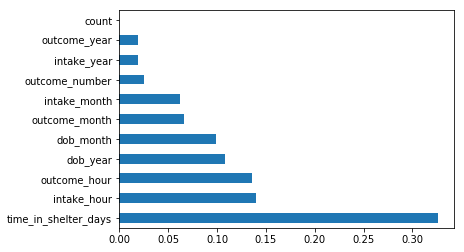

In [17]:
model1 = ExtraTreesClassifier()
model1.fit(X_nCodes,y_codes)
print(model1.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances1 = pd.Series(model1.feature_importances_, index=X_nCodes.columns)
feat_importances1.nlargest(11).plot(kind='barh')
plt.show()



In [18]:
#Hence Extracting Final Numerical Features.
X_drop_Numeric = X_numeric.drop(["count","outcome_year","intake_year"], axis = 1)
#X_drop_Numeric.head()
finalNumericCol = list(X_drop_Numeric.columns) #Use These Numerical Columns For Training.


print("Hence, Looking at the above Visualization we infer the list of final numerical Columns :",finalNumericCol)

Hence, Looking at the above Visualization we infer the list of final numerical Columns : ['dob_year', 'dob_month', 'intake_month', 'intake_hour', 'time_in_shelter_days', 'outcome_month', 'outcome_hour', 'outcome_number']


In [19]:
SelectedFeatures = finalCatCol+finalNumericCol
SelectedFeatures # List of final Selected Features Considered For training the data --

['animal_type',
 'breed',
 'color',
 'intake_condition',
 'intake_type',
 'sex_upon_intake',
 'intake_weekday',
 'sex_upon_outcome',
 'outcome_weekday',
 'dob_year',
 'dob_month',
 'intake_month',
 'intake_hour',
 'time_in_shelter_days',
 'outcome_month',
 'outcome_hour',
 'outcome_number']

In [20]:
#Printing the Original Data with Selected Columns. 
Traindf = X[SelectedFeatures] #The Training DataFrame !! 
display(Traindf.head())
Traindf.isnull().sum() 

,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,intake_weekday,sex_upon_outcome,outcome_weekday,dob_year,dob_month,intake_month,intake_hour,time_in_shelter_days,outcome_month,outcome_hour,outcome_number
0,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,Thursday,Neutered Male,Thursday,2007,7,12,14,0.588194,12,0,1.0
1,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,Friday,Neutered Male,Saturday,2007,7,12,10,1.259722,12,16,2.0
2,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,Friday,Neutered Male,Saturday,2007,7,3,14,1.113889,3,17,3.0
3,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,Wednesday,Neutered Male,Monday,2004,4,4,15,4.970139,4,15,1.0
4,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,Saturday,Neutered Male,Saturday,1997,10,11,9,0.119444,11,11,1.0


animal_type             0
breed                   0
color                   0
intake_condition        0
intake_type             0
sex_upon_intake         1
intake_weekday          0
sex_upon_outcome        1
outcome_weekday         0
dob_year                0
dob_month               0
intake_month            0
intake_hour             0
time_in_shelter_days    0
outcome_month           0
outcome_hour            0
outcome_number          0
dtype: int64

We Can See from Above there is 1 NAN in Sex_upon_intake and Sex_upon_outcome Columns.

**DEFINING MODEL CATBOOSTCLASSIFIER AND EVALUATION,
PREDICTING THE VALUES AND SAVING THE RESULTS**

In [ ]:
#HANDLING NULL VALUES AND CATEGORICAL COLUMNS
Traindf.fillna(-999,inplace=True)
X_test_full.fillna(-999,inplace=True)
cate_features_index = np.where(Traindf.dtypes != float)[0]
#SPLITTING THE DATASET FOR TRAINING AND EVALUATION OF THE MODEL
Traindf["outcome_number"] = Traindf["outcome_number"].astype(np.int64)
Traindf["time_in_shelter_days"] = Traindf["time_in_shelter_days"].astype(np.int64)
X1_train, X1_test, y1_train, y1_test = train_test_split(Traindf,y, train_size=0.85,random_state=1234)

#Preparing target variable column
le = LabelEncoder()
le.fit(y1_train)
y1_train_enc = le.transform(y1_train)
y1_test_enc = le.transform(y1_test)

#TRAINING STAGE AND EVALUATION 

#TRAINING THE CATBOOSTCLASSIFIER MODEL ON TRAIN DATA
cat = CatBoostClassifier(one_hot_max_size=7,eval_metric='Accuracy',
                         use_best_model=True,random_seed=42,loss_function='MultiClass')
cat.fit(X1_train,y1_train_enc,cat_features=cate_features_index,eval_set=(X1_test,y1_test_enc))
 
#Checking the Accuracy of the Test Score
#pool = Pool(X1_train, y1_train_enc, cat_features=cate_features_index)
#cv_scores = cv(pool, cat.get_params(), fold_count=10, plot=True)
#print('CV score: {:.5f}'.format(cv_scores['test-Accuracy-mean'].values[-1]))
print('the test accuracy is :{:.6f}'.format(accuracy_score(y1_test_enc,cat.predict(X1_test))))

#PREDICTION AND SAVING RESULTS STAGE 


#PREDICTING VALUES BY USING TEST DATA
X_ready = X_test_full[SelectedFeatures]
X_ready["time_in_shelter_days"] = X_ready["time_in_shelter_days"].astype(np.int64)
pred = cat.predict(X_ready)

#INVERSE LABELENCODING TRANSFORM TO PASS THE ORIGINAL LABELS PREDICTED BY THE MODEL AS A NUMPY ARRAY.
result = list(le.inverse_transform(pred))
out_arr = np.asarray(result)

#Checkpoint to Handle the PREDICTED VALUES passed to .csv file
#print(type(result))
#print(type(out_arr)) 
#print(result)  #You Can Print Predictions to the Console ! 
#print('Train', X1_train.shape, y1_train.shape)
#print('Test', X1_test.shape, y1_test.shape)

#WRITING THE OUTPUT, CONTAINING PREDICTED VALUES BACK TO THE SUBMISSION.CSV FILE.
output = pd.DataFrame({'animal_id_outcome': X_test_full.animal_id_outcome,'outcome_type': out_arr})
output.to_csv('submission.csv', index=False)





**Predicted Values already Submitted : From the Above Code Cell ! **

